<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_0_8_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_0.8_n20.csv',
 'data_add_delta_0.8_n30.csv',
 'data_add_delta_0.8_n60.csv',
 'data_add_delta_0.8_n120.csv',
 'data_add_delta_0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,97.314689,26.811758,47.145018,6.953830,188.225295,172.094210,16.131085
1,0.0,1.0,84.811384,90.263394,48.152488,1.239534,234.466801,240.271612,-5.804811
2,0.0,2.0,85.367006,79.971966,30.234286,7.250092,212.823350,207.192733,5.630618
3,0.0,3.0,77.359299,99.361088,30.715902,2.082546,219.518834,224.084405,-4.565571
4,0.0,4.0,66.172252,77.690898,81.326401,3.733838,238.923389,244.523723,-5.600334
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,74.209446,68.505229,38.547898,7.746001,199.008574,188.677192,10.331382
119996,999.0,116.0,59.821851,70.493625,39.142519,-22.259357,157.198638,177.304470,-20.105831
119997,999.0,117.0,27.825940,21.812149,86.626142,20.405356,166.669586,147.057829,19.611758
119998,999.0,118.0,98.429329,29.603075,35.081782,12.711285,185.825471,165.593469,20.232002


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,97.314689,26.811758,47.145018,6.953830,188.225295,172.094210,16.131085
1,0.0,1.0,84.811384,90.263394,48.152488,1.239534,234.466801,240.271612,-5.804811
2,0.0,2.0,85.367006,79.971966,30.234286,7.250092,212.823350,207.192733,5.630618
3,0.0,3.0,77.359299,99.361088,30.715902,2.082546,219.518834,224.084405,-4.565571
4,0.0,4.0,66.172252,77.690898,81.326401,3.733838,238.923389,244.523723,-5.600334
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,74.209446,68.505229,38.547898,7.746001,199.008574,188.677192,10.331382
119996,999.0,116.0,59.821851,70.493625,39.142519,-22.259357,157.198638,177.304470,-20.105831
119997,999.0,117.0,27.825940,21.812149,86.626142,20.405356,166.669586,147.057829,19.611758
119998,999.0,118.0,98.429329,29.603075,35.081782,12.711285,185.825471,165.593469,20.232002


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    97.314689  26.811758  47.145018  ...  188.225295  172.094210  16.131085
      1.0    84.811384  90.263394  48.152488  ...  234.466801  240.271612  -5.804811
      2.0    85.367006  79.971966  30.234286  ...  212.823350  207.192733   5.630618
      3.0    77.359299  99.361088  30.715902  ...  219.518834  224.084405  -4.565571
      4.0    66.172252  77.690898  81.326401  ...  238.923389  244.523723  -5.600334
...                ...        ...        ...  ...         ...         ...        ...
999.0 115.0  74.209446  68.505229  38.547898  ...  199.008574  188.677192  10.331382
      116.0  59.821851  70.493625  39.142519  ...  157.198638  177.304470 -20.105831
      117.0  27.825940  21.812149  86.626142  ...  166.669586  147.057829  19.611758
      118.0  98.429329  29.603075  35.081782  ...  185.825471  165.593469  20.232002
      119.0  48.220330  29.617922  33.572581  ...  122.618020  114.062437   8.555583

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    97.314689  26.811758  47.145018  ...  188.225295  172.094210  16.131085
      1.0    84.811384  90.263394  48.152488  ...  234.466801  240.271612  -5.804811
      2.0    85.367006  79.971966  30.234286  ...  212.823350  207.192733   5.630618
      3.0    77.359299  99.361088  30.715902  ...  219.518834  224.084405  -4.565571
      4.0    66.172252  77.690898  81.326401  ...  238.923389  244.523723  -5.600334
...                ...        ...        ...  ...         ...         ...        ...
999.0 115.0  74.209446  68.505229  38.547898  ...  199.008574  188.677192  10.331382
      116.0  59.821851  70.493625  39.142519  ...  157.198638  177.304470 -20.105831
      117.0  27.825940  21.812149  86.626142  ...  166.669586  147.057829  19.611758
      118.0  98.429329  29.603075  35.081782  ...  185.825471  165.593469  20.232002
      119.0  48.220330  29.617922  33.572581  ...  122.618020  114.062437   8.555583

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,97.314689,26.811758,47.145018,6.953830,188.225295,172.094210,16.131085
1,0.0,1.0,84.811384,90.263394,48.152488,1.239534,234.466801,240.271612,-5.804811
2,0.0,2.0,85.367006,79.971966,30.234286,7.250092,212.823350,207.192733,5.630618
3,0.0,3.0,77.359299,99.361088,30.715902,2.082546,219.518834,224.084405,-4.565571
4,0.0,4.0,66.172252,77.690898,81.326401,3.733838,238.923389,244.523723,-5.600334
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,74.209446,68.505229,38.547898,7.746001,199.008574,188.677192,10.331382
119996,999.0,116.0,59.821851,70.493625,39.142519,-22.259357,157.198638,177.304470,-20.105831
119997,999.0,117.0,27.825940,21.812149,86.626142,20.405356,166.669586,147.057829,19.611758
119998,999.0,118.0,98.429329,29.603075,35.081782,12.711285,185.825471,165.593469,20.232002


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    97.314689  26.811758  47.145018  ...  188.225295  172.094210  16.131085
      1.0    84.811384  90.263394  48.152488  ...  234.466801  240.271612  -5.804811
      2.0    85.367006  79.971966  30.234286  ...  212.823350  207.192733   5.630618
      3.0    77.359299  99.361088  30.715902  ...  219.518834  224.084405  -4.565571
      4.0    66.172252  77.690898  81.326401  ...  238.923389  244.523723  -5.600334
...                ...        ...        ...  ...         ...         ...        ...
999.0 115.0  74.209446  68.505229  38.547898  ...  199.008574  188.677192  10.331382
      116.0  59.821851  70.493625  39.142519  ...  157.198638  177.304470 -20.105831
      117.0  27.825940  21.812149  86.626142  ...  166.669586  147.057829  19.611758
      118.0  98.429329  29.603075  35.081782  ...  185.825471  165.593469  20.232002
      119.0  48.220330  29.617922  33.572581  ...  122.618020  114.062437   8.555583

[120000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

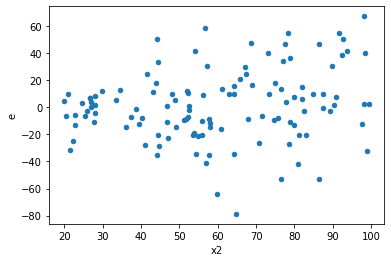

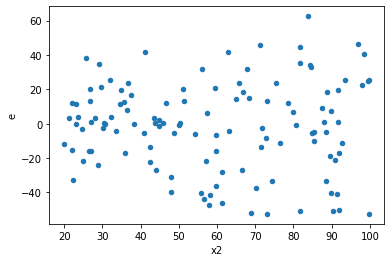

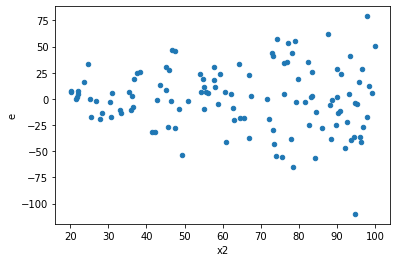

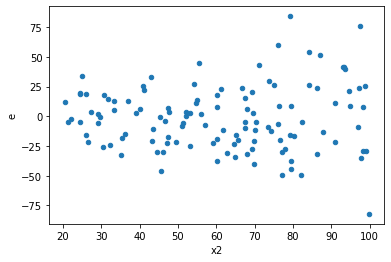

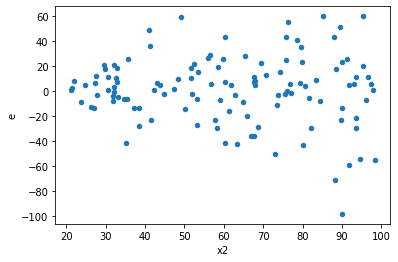

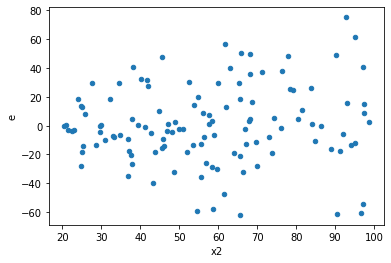

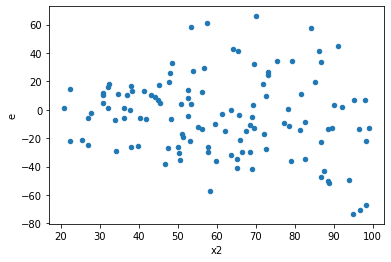

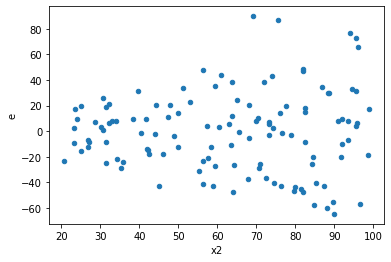

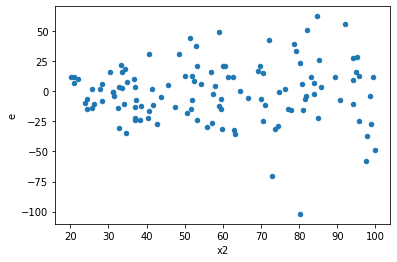

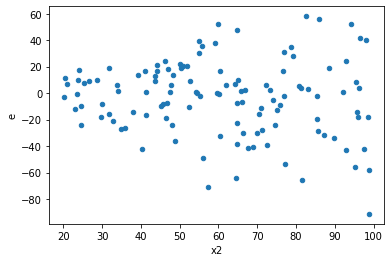

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,45.0,45.0,37651.319655563224,11465.926405412185,855.7118103537097,260.5892364866406,3.283757310511859,0.00011424213354049861,0.9999428789332298,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,43418.38840949121,13869.357438453444,986.7815547611638,315.2126690557601,3.130526313289157,0.00020668303180304548,0.9998966584840985,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,54119.820621775914,18056.086820525004,1229.99592322218,410.36560955738645,2.9973172570402116,0.00034918703437680776,0.9998254064828116,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,57220.23863778678,15572.530086274326,1300.4599690406087,353.9211383244165,3.6744342968533332,2.6510882501051825e-05,0.9999867445587495,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,55248.87564599546,14129.756203307119,1255.656264681715,321.1308228024345,3.9101082036407866,1.1373735285369335e-05,0.9999943131323573,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,42655.14929498707,15899.750829028919,969.4352112497062,361.3579733870209,2.6827558339536726,0.0012438026933787594,0.9993780986533106,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,46303.006938620456,14029.388747494155,1052.3410667868286,318.8497442612308,3.300429389476489,0.00010717793085679439,0.9999464110345716,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,64655.43670569933,18933.72283893243,1469.4417433113483,430.31188270300976,3.414829574496132,6.941454349518317e-05,0.9999652927282524,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,46235.88952870575,12321.369645556155,1050.815671106949,280.0311283080944,3.752495936633252,1.9972940348722545e-05,0.9999900135298256,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,37651.319655563224,11465.926405412185,855.7118103537097,260.5892364866406,3.283757310511859,0.00011424213354049861,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,43418.38840949121,13869.357438453444,986.7815547611638,315.2126690557601,3.130526313289157,0.00020668303180304548,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,54119.820621775914,18056.086820525004,1229.99592322218,410.36560955738645,2.9973172570402116,0.00034918703437680776,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,57220.23863778678,15572.530086274326,1300.4599690406087,353.9211383244165,3.6744342968533332,2.6510882501051825e-05,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,55248.87564599546,14129.756203307119,1255.656264681715,321.1308228024345,3.9101082036407866,1.1373735285369335e-05,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,42655.14929498707,15899.750829028919,969.4352112497062,361.3579733870209,2.6827558339536726,0.0012438026933787594,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,46303.006938620456,14029.388747494155,1052.3410667868286,318.8497442612308,3.300429389476489,0.00010717793085679439,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,64655.43670569933,18933.72283893243,1469.4417433113483,430.31188270300976,3.414829574496132,6.941454349518317e-05,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,46235.88952870575,12321.369645556155,1050.815671106949,280.0311283080944,3.752495936633252,1.9972940348722545e-05,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    967
Reject005=1 : Homoscedasticity       33
Name: Result_test, dtype: int64